In [1]:
import numpy as np
import datajoint as dj
import trimesh
from collections import Counter
pinky = dj.create_virtual_module("pinky","microns_pinky")
pinky_fc = dj.create_virtual_module("pinky_fc|","microns_pinky_fc")
schema = dj.schema("microns_pinky")

Connecting celiib@10.28.0.34:3306


In [2]:
postsyn_length,n_synapses= pinky.SkeletonContact.fetch("postsyn_length","n_synapses")

In [3]:
postsyn_length

array([3445.86, 5333.98, 9471.47, ..., 7684.1 , 7553.76, 7176.47])

In [4]:
np.mean(postsyn_length)

6801.689445098966

In [7]:
import seaborn as sns
sns.set()

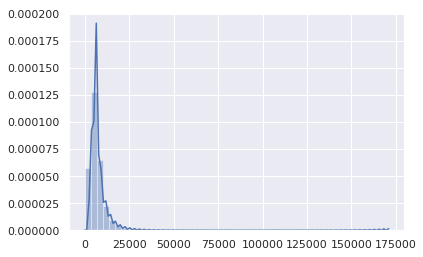

In [8]:
sns.distplot(postsyn_length)

In [5]:

binary_synapses = (n_synapses>0).astype("int")
#binary_synapses = n_synapses
more_one_synapse = n_synapses[n_synapses>0]
binary_synapses = more_one_synapse

In [6]:
postsyn_length = postsyn_length[n_synapses>0]
len(postsyn_length),len(binary_synapses)

(325508, 325508)

In [7]:
np.min(postsyn_length)
np.max(postsyn_length)

144366.0

In [8]:
bins = np.linspace(np.min(postsyn_length),np.max(postsyn_length)+1,20)
bins

array([4.11543000e+01, 7.63725144e+03, 1.52333486e+04, 2.28294457e+04,
       3.04255429e+04, 3.80216400e+04, 4.56177372e+04, 5.32138343e+04,
       6.08099314e+04, 6.84060286e+04, 7.60021257e+04, 8.35982229e+04,
       9.11943200e+04, 9.87904171e+04, 1.06386514e+05, 1.13982611e+05,
       1.21578709e+05, 1.29174806e+05, 1.36770903e+05, 1.44367000e+05])

In [9]:
np.max(postsyn_length)

144366.0

In [10]:
equal_depth_bin = []
for i in range(0,20):
    equal_depth_bin.append(np.percentile(postsyn_length,i/20*100))
equal_depth_bin.append(np.max(postsyn_length)+1)
bins = equal_depth_bin

In [11]:
inds = np.digitize(postsyn_length, bins)
inds_counter = Counter(inds)

In [12]:
ind_list = list(inds_counter.keys())

In [13]:
probability_synapse = dict()
probability_length = dict()
indicies_list = []
for i in range(1,20):
    indicies_list.append(i)
    #get the number of segments in that length
    number_of_segments = inds_counter[i]
    number_of_binary_synapses = np.sum(binary_synapses[inds == i])
    probability_synapse[i] = number_of_binary_synapses/number_of_segments
    probability_length[i] = number_of_segments


In [14]:
probability_synapse

{1: 1.0195379700172031,
 2: 1.0288786482334868,
 3: 1.0313344802162694,
 4: 1.0352073732718894,
 5: 1.0337962394002704,
 6: 1.0355102291577072,
 7: 1.0332411674347157,
 8: 1.0353917050691244,
 9: 1.0410420250675843,
 10: 1.0455913978494624,
 11: 1.05247311827957,
 12: 1.060702875399361,
 13: 1.06624062922453,
 14: 1.0765591397849463,
 15: 1.0847822080235916,
 16: 1.098869362172791,
 17: 1.1137257311378717,
 18: 1.1406365200294912,
 19: 1.178678955453149}

In [15]:
indicies_list
keys_prob = probability_synapse.keys()
values_prob = probability_synapse.values()


In [17]:
indicies_list
import matplotlib.pyplot as plt

Text(0.5, 0, 'Postysyn Length Bin')

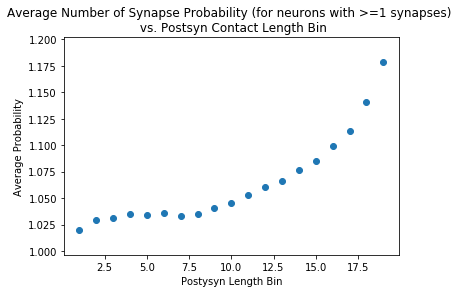

In [22]:

plt.scatter(keys_prob,values_prob)
plt.title("Average Number of Synapse Probability (for neurons with >=1 synapses) \n vs. Postsyn Contact Length Bin")
plt.ylabel("Average Probability")
plt.xlabel("Postysyn Length Bin")

In [49]:
indicies_list
keys_prob = probability_length.keys()
values_prob = probability_length.values()


In [52]:
values_prob


dict_values([4483818, 921861, 132743, 30165, 8188, 2458, 840, 295, 131, 52, 22, 11, 8, 4, 0, 2, 1, 0, 1])

In [71]:
# doing synapse density
pinky.SkeletonContact()

segmentation segmentation id,contact_id,presyn segment id unique within each Segmentation,postsyn segment id unique within each Segmentation,contact_x,contact_y,contact_z,presyn_length,postsyn_length,n_synapses,synapse_sizes_mean,majority_label,majority_label_ratio
3,0,648518346341351467,648518346341376363,213252,259562,52565,3962.03,3445.86,0,0.0,8,1.0
3,1,648518346341351467,648518346341382069,230254,192358,48611,1786.24,5333.98,0,0.0,8,1.0
3,2,648518346341351467,648518346341382445,207389,223918,58435,10160.4,9471.47,0,0.0,8,1.0
3,3,648518346341351467,648518346341382445,209425,235416,63081,1440.43,1911.07,0,0.0,8,1.0
3,4,648518346341351467,648518346341382445,211683,245770,66945,22180.2,19708.8,0,0.0,8,1.0
3,5,648518346341351467,648518346341385331,225607,267972,76022,6403.25,6135.18,0,0.0,8,1.0
3,6,648518346341351467,648518346341401564,228597,194911,53377,2715.79,2920.31,0,0.0,8,1.0
3,7,648518346341351467,648518346341411405,226404,201911,61696,3026.8,6586.38,1,1507.0,8,1.0
3,8,648518346341351467,648518346344420099,225592,197864,60522,9282.62,7208.36,0,0.0,8,1.0
3,9,648518346341351467,648518346344465416,201048,214398,69602,4269.58,4297.66,0,0.0,8,1.0
